In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import scipy.stats as ss

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
boston['MEDV'] = boston_dataset.target

In [7]:
#TRANSFORM ROWS TO COLUMNS

boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


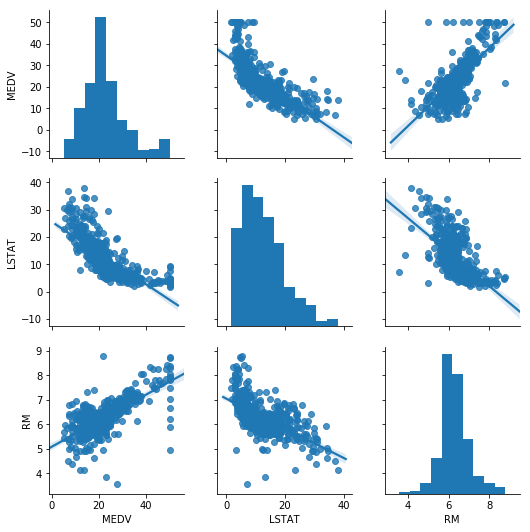

In [8]:
g = sns.pairplot(boston, vars=["MEDV", "LSTAT","RM"], kind="reg")

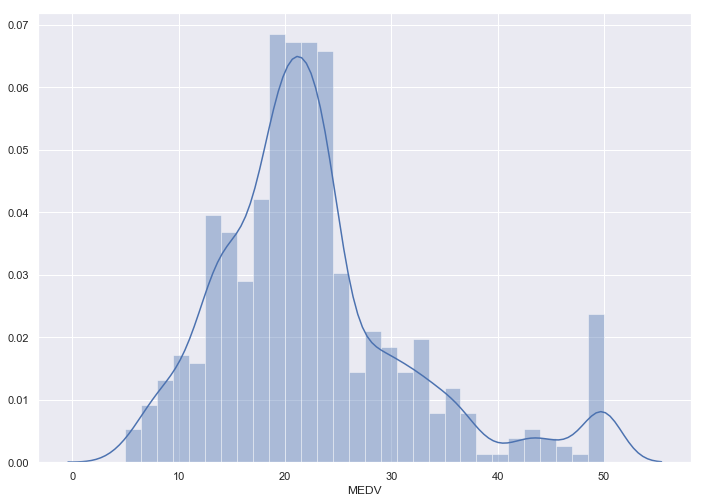

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

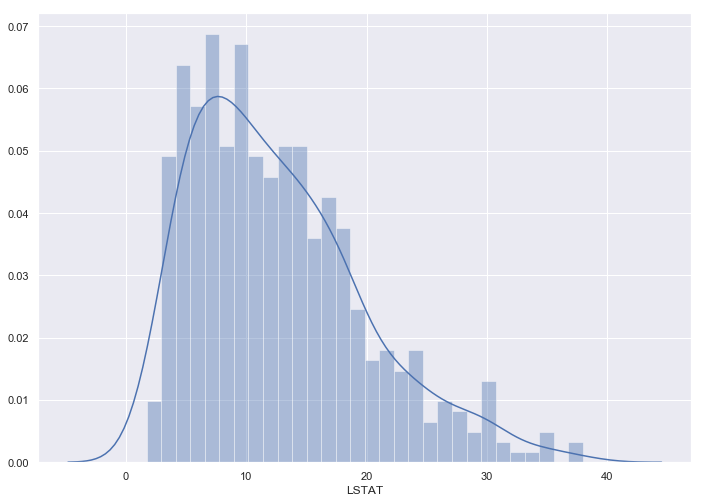

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['LSTAT'], bins=30)
plt.show()

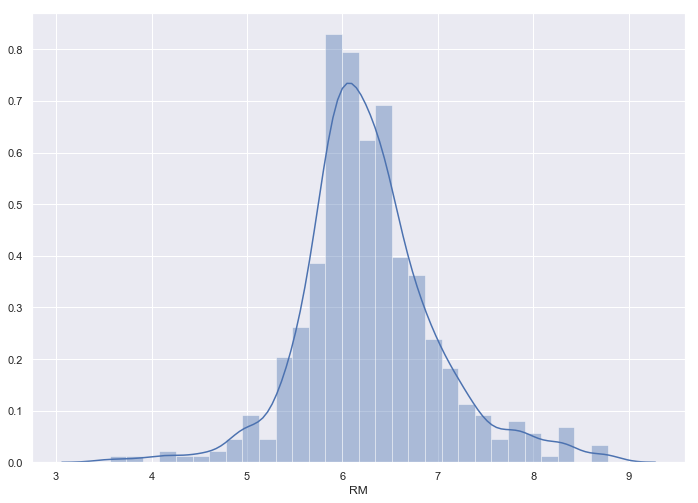

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['RM'], bins=30)
plt.show()

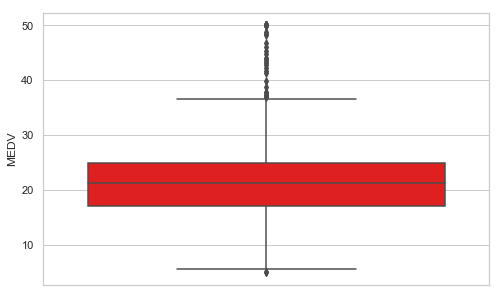

In [12]:
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="MEDV",data=boston,color="red")

Add Notes

In [13]:
boston["CHAScat"] = boston["CHAS"].astype('category')


In [14]:
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

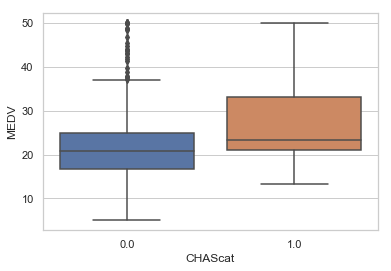

In [15]:
%matplotlib inline
sns.boxplot(x='CHAScat', y='MEDV', data=boston)

On the X axis 1 represents land that bounds the river while 0 does not. You would expect that houses closer to the river 
would have higher median prices and we see that the median house price is higher for box plot on the right, although not
significantly. The interquartile range (25 - 75% percentile) illustrated by the rectangle starts and ends much higher, at over 200,000 up to over 300,000 for houses that tract the land. This indicates that land that tracts the river have higher median house values. 

# Inferential Statistics

## Correlation

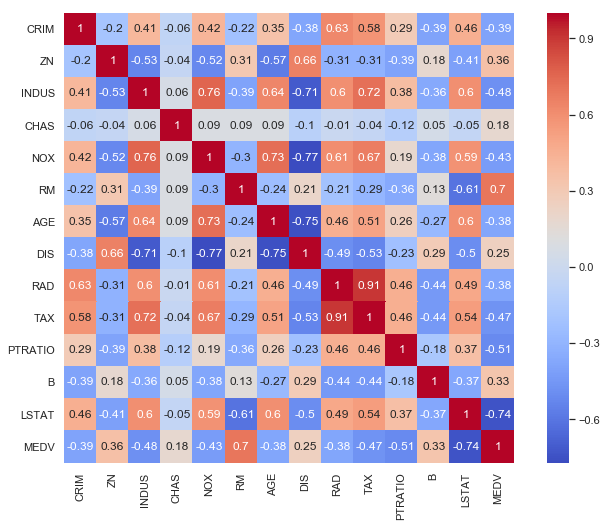

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston.corr().round(2), square=True, annot=True,cmap ='coolwarm')


The strongest positive correlations are displayed in dark green and the strongest negative correlations are displayed
in red - between 1 and minus 1

The dependent variable (target variable) is MEDV (median house value) and the strongest correlation is with
LSTAT (lowest status of the poulation) -0.74 and RM 0.7. A correlation can also be seen between MEDV and RM (0.7) RM and LSTAT (-0.61), but there is no correlation between MEDV and CHAS. 



## T-Test

The following code cells give us an understanding of both populations i.e. mean, standard deviation of the distribution and
how skewness of the distribution. When conducting a Ttest it is importand understand these basic statistics to choose the
correct TTest. 

I decided to use a welch's Ttest to perform my analysis as the sample sizes will be different, will be unpaired and the  
variance is also different. See cells below for sample sizes, standard devaiation and skewness

The null hypoteseis for this Ttest is that the populations being tested tract 0 (houses not on the river tract) and tract1 (houses on river tract) are not statisticallly significantly different. 

If the P Value is less than 0.5 then we reject the null hypotesis and have more than 95% confidence that the conclusion of the test will be valid and not just down to random chance.

In [17]:
tract0 = boston['MEDV'][boston['CHAScat'] == 0]

In [18]:
tract1 = boston['MEDV'][boston['CHAScat'] == 1]

In [24]:
##check for similar standard deviations 
boston.groupby('CHAScat')['MEDV'].std()

CHAScat
0.0     8.831362
1.0    11.816643
Name: MEDV, dtype: float64

In [31]:
##check for similar means
boston.groupby('CHAScat')['MEDV'].mean()

CHAScat
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64

In [20]:
##check population sizes
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

In [21]:
##check for similar variances in population
boston.groupby('CHAScat')['MEDV'].skew()

CHAScat
0.0    1.056908
1.0    0.943012
Name: MEDV, dtype: float64

In [25]:
import matplotlib.patches as mpatches

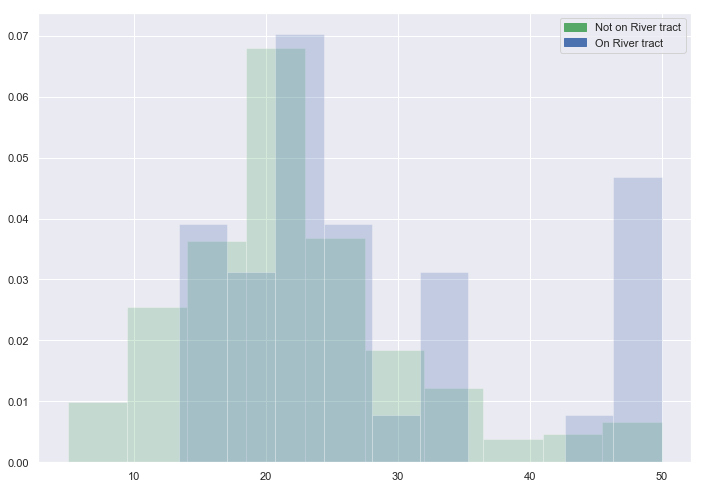

In [26]:
green_patch = mpatches.Patch(color='g', label='Not on River tract')
blue_patch = mpatches.Patch(color='b', label='On River tract')

plt.hist(tract0, density=True, color='g', alpha=0.25)
plt.hist(tract1, density=True, color='b', alpha=0.25)

plt.legend(handles=[green_patch,blue_patch])

In [22]:
ss.ttest_ind(tract0,tract1,equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We can see that the pvalue is less than 0.5 and the null hypotesis can be rejected. Although both distributions
over the median house values in both pulation is statistically siginificantly different. 

## Linear Regression

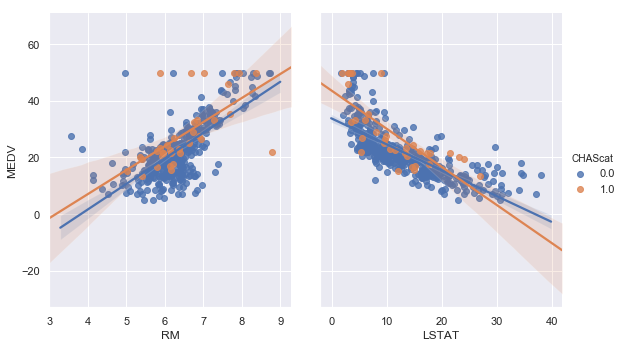

In [45]:
sns.pairplot(boston, x_vars=["RM", "LSTAT"], y_vars=["MEDV"],
             hue="CHAScat", height=5, aspect=.8, kind="reg");

In [49]:
## do liner regression where category is more visisble / also look at correlation